In [2]:
# libraries
%load_ext autoreload
%autoreload 2

import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
%matplotlib inline

from PDM2PCM import *
from PCM2PDM import *
from Serialize import *
from PlotSuite import *

In [36]:
fname = "sine_wave_cross_testing_pdm_32bitsample_2000000hz"
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/data/"
fs_pdm = 2000000
os = 64
data_pdm, _ = sf.read( 
                        wd+fname, 
                        channels=1, 
                        samplerate=int(fs_pdm/(2*32)), 
                        format='RAW', 
                        endian='BIG', 
                        subtype='PCM_16', 
                        dtype=np.int16
                    )

In [4]:
fname = "sine_wave_cross_testing_pcm_44100khz"
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/data/"
fs_pcm = 44100
data_pcm, _ = sf.read( 
                        wd+fname, 
                        channels=1, 
                        samplerate=int(fs_pcm), 
                        format='RAW', 
                        endian='BIG', 
                        subtype='PCM_16', 
                        dtype=np.int16
                    )
data_pcm = data_pcm[int(2e5):int(2e5+2**16)]

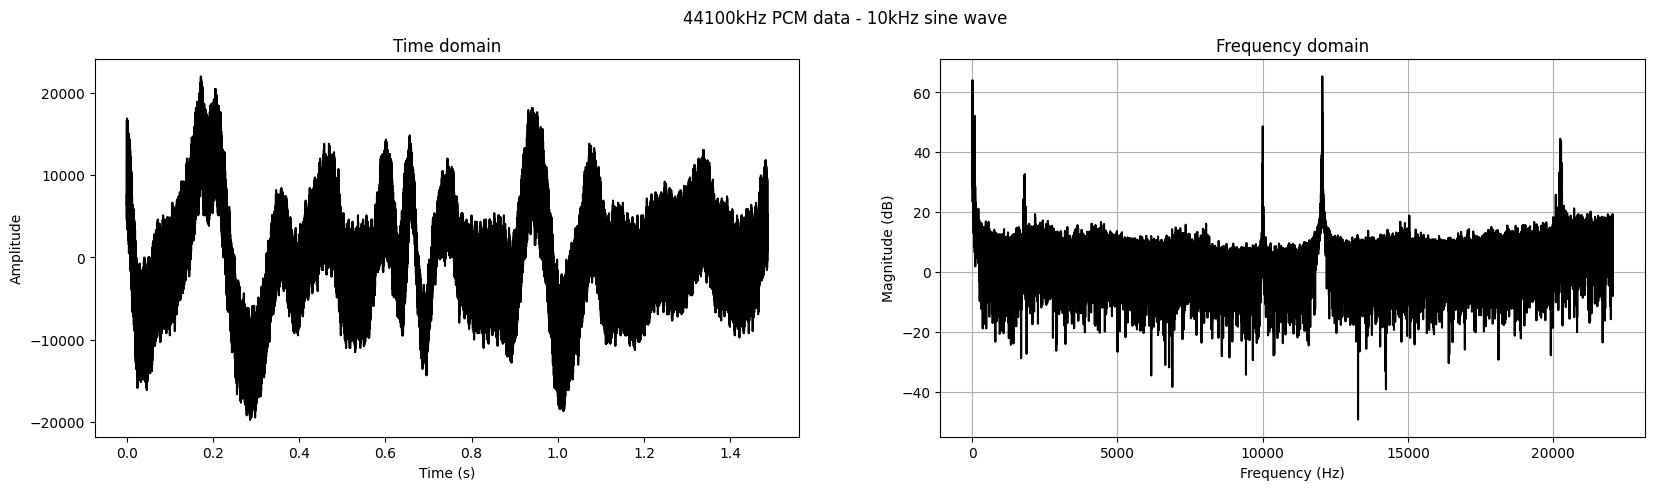

In [42]:
full_plot(data_pcm, fs_pcm, short=False, title='44100kHz PCM data - 10kHz sine wave')

In [123]:
fname = "sine_wave_1_cross_testing_pdm_16bitsample_2000000mhz"
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/data/"
fs_pdm = 2000000
os = 32
data_pdm, _ = sf.read( 
                        wd+fname, 
                        channels=1, 
                        samplerate=int(fs_pdm/(2*16)), 
                        format='RAW', 
                        endian='BIG', 
                        subtype='PCM_16', 
                        dtype=np.int16
                    )

Input data: [ 12979 -27031 -22996 ... -13270  21814  13273] <class 'numpy.int16'>
Byte stream: [179  50 105 ...  85 217  51] <class 'numpy.uint8'>
Byte bits reversed: [205  76 150 ... 170 155 204] <class 'numpy.uint8'>
Bit stream: [1 1 0 ... 1 0 0] <class 'numpy.uint8'>


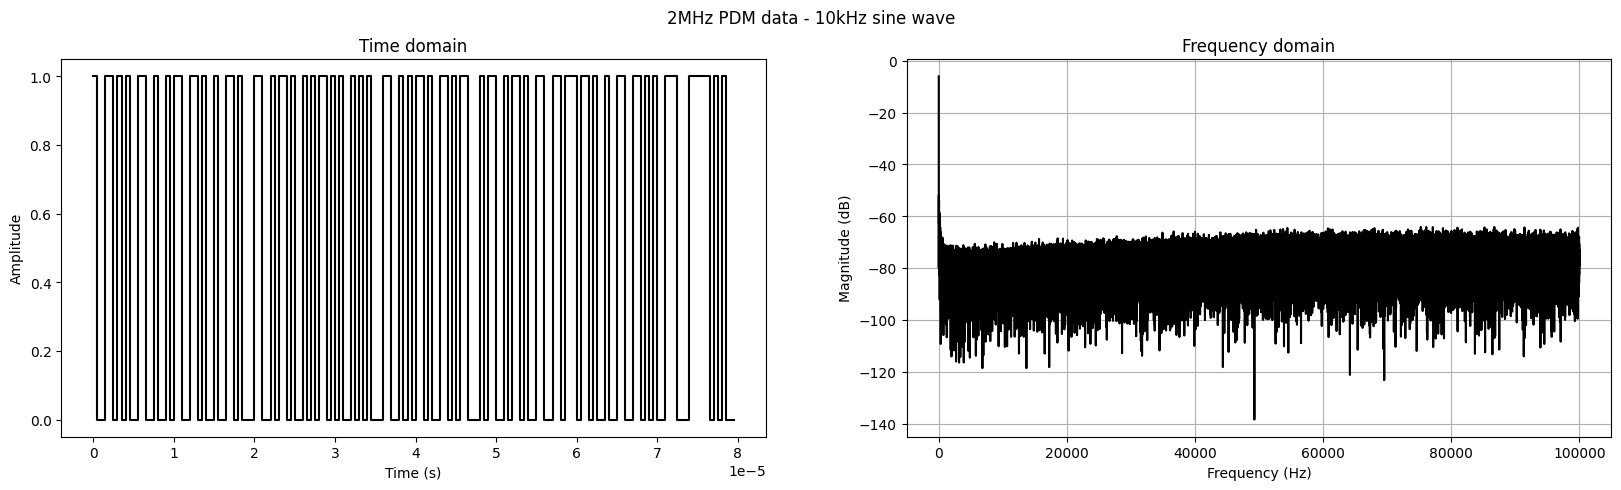

In [124]:
# pdm_stream = serialize(data_pdm[400:402], swap_bytes=False, reverse_bit_hword_stage=False, reverse_bit_byte_stage=False, to_print=True)
pdm_stream = serialize(data_pdm[int(2e5):int(3e5)], swap_bytes=False, reverse_bit_hword_stage=False, reverse_bit_byte_stage=True, to_print=True)
full_plot(pdm_stream, fs_pdm, short=True, title='2MHz PDM data - 10kHz sine wave')

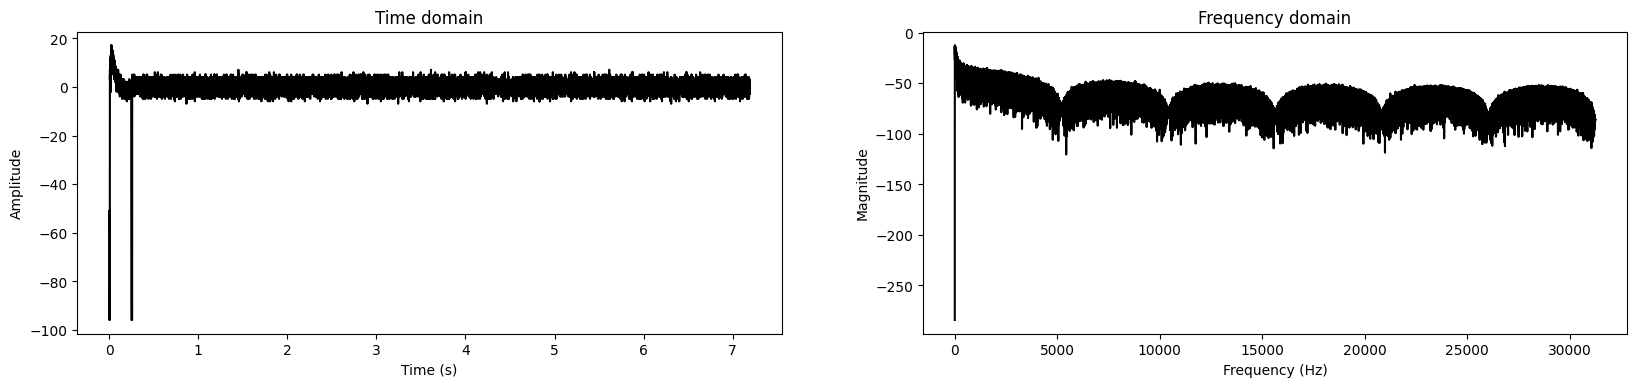

In [69]:
pdm2pcm = PDM2PCM(pdm_stream, fs_pdm=fs_pdm, os=32, stages=1, delay=12)
pdm2pcm.mag_plot()

In [70]:
sd.play(pdm2pcm.data_pcm, samplerate=fs_pdm/32)